In [1]:
#Here I create a 5 years of seasonal data with a utility I wrote.(Check other LSTM notebooks)
#This 5 year data is 1st not changing so much
#Then I add more values to 5th month just to see if this method can find the difference
#Then I simulate a global warming tempatures get higher and higher

trends [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
values [5, 10, 13, 15, 18, 28, 29, 30, 25, 20, 10, 4]
values [5, 10, 13, 15, 18, 28, 29, 30, 25, 20, 10, 4]
values [5, 10, 13, 15, 18, 28, 29, 30, 25, 20, 10, 4]
values [5, 10, 13, 15, 18, 28, 29, 30, 25, 20, 10, 4]
values [5, 10, 13, 15, 18, 28, 29, 30, 25, 20, 10, 4]


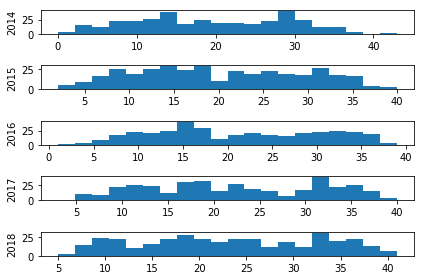

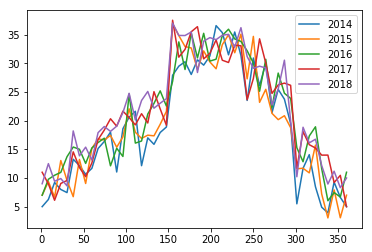

In [3]:
means= [5,10, 13,15,18, 28,29,30 ,25,20,10 , 4]
trends = [0 for k in means]

years5 = gen_multi_dim_data(trends=trends, means= means,stds=[2,3,4,5,6],samples=30)

dff = convert_to_df(years5,["2014","2015","2016","2017","2018"])
df_to_hist(dff)
summarize_df_plots(dff)

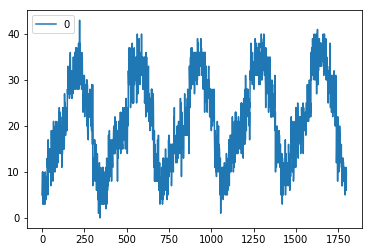

In [141]:
datas = []
for col in dff.columns :
  datas.append( dff[col].values.flatten())

flat= np.array(datas).flatten()
dataset = pd.DataFrame(flat)
dataset.plot()

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
%matplotlib inline


In [143]:

def apply_yearly_holtwinters(dset,period,split,trend,damped,season):    
    train, test = dset.iloc[:split+1, 0], dset.iloc[split:, 0]
    print("Params",period,split,trend,damped,season)
    exp = ExponentialSmoothing(train, trend=trend, damped=damped, seasonal=season, seasonal_periods=period)
    model = exp.fit()    
    pred = model.predict(start=test.index[0], end=test.index[-1])
    plt.figure(figsize=(22, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(pred.index, pred, label='Prediction')
    plt.show()

Params 360 720 add False add


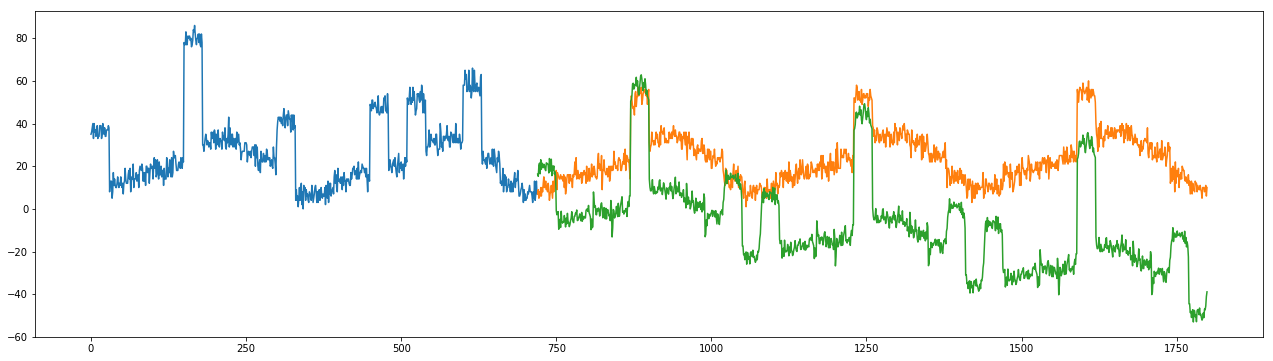

Params 360 1080 add False add


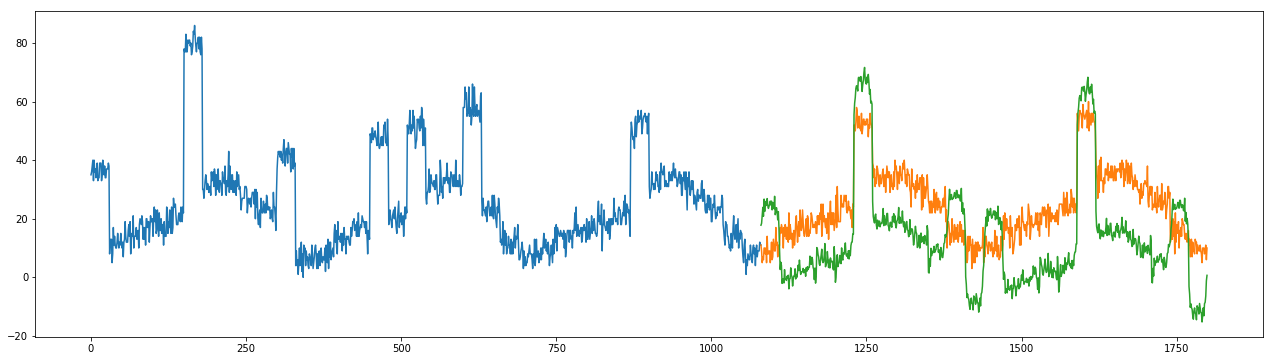

Params 360 1440 add False add


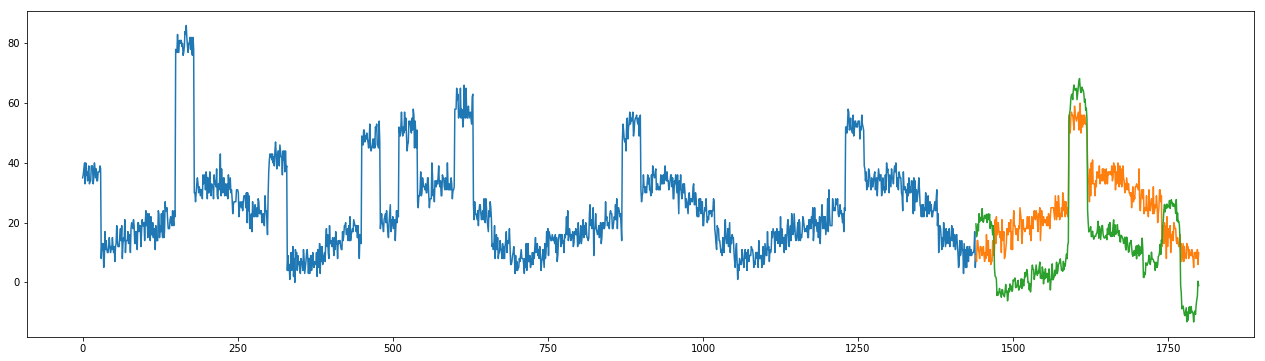

In [144]:
slpits = [360*2,360*3,360*4]
for slpit in slpits:
    apply_yearly_holtwinters(dataset,360, slpit,"add",False,"add")

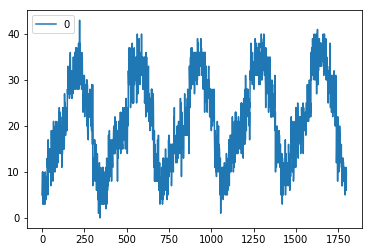

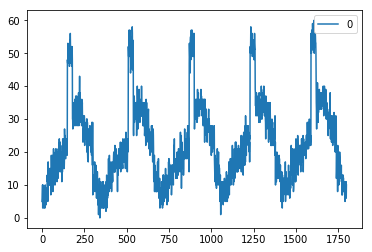

In [145]:
shifted = flat.copy()
for i in range(len(shifted)//360 ):
    begin = i * 360 + 5 * 30
    end = begin + 30
    for k in range(begin,end):
        shifted[k] = shifted[k]+20
        
pd.DataFrame(flat).plot()
pd.DataFrame(shifted).plot()
    


Params 360 720 add False add


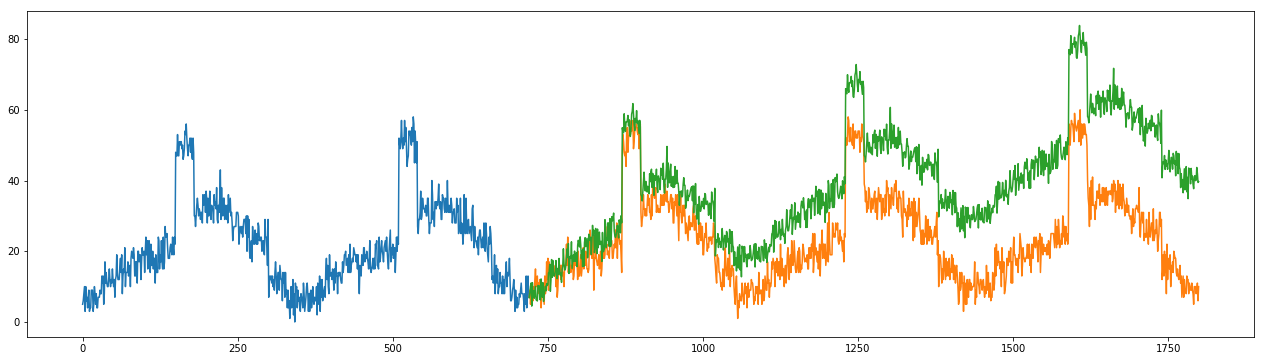

Params 360 1080 add False add


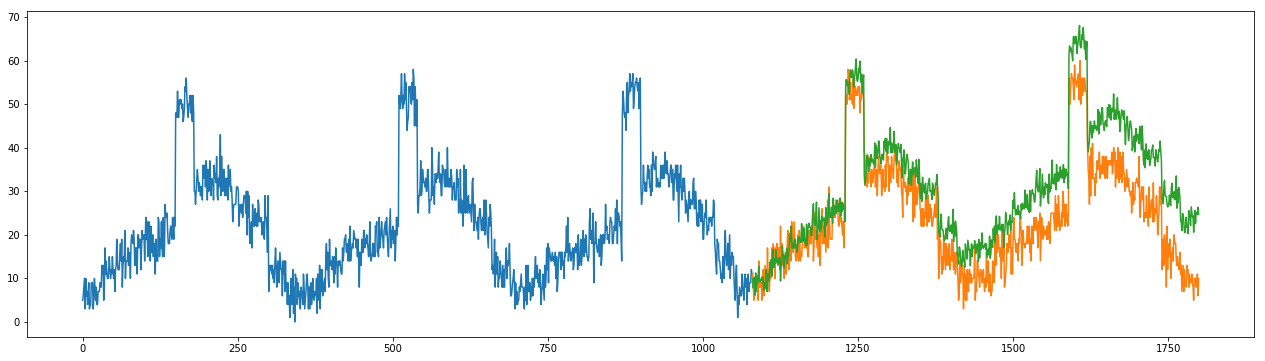

Params 360 1440 add False add


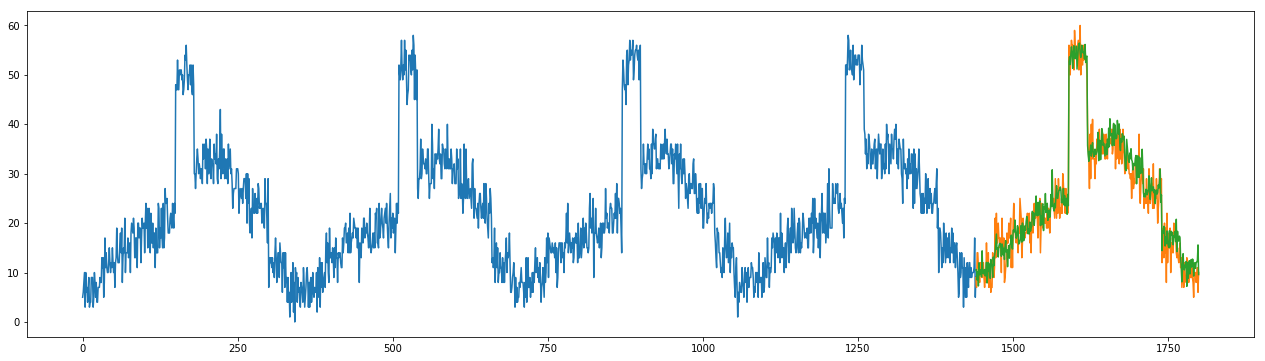

In [146]:
slpits = [360*2,360*3,360*4]
for slpit in slpits:
    apply_yearly_holtwinters(pd.DataFrame(shifted),360, slpit,"add",False,"add")

trends [100, 200, 260, 300, 360, 560, 580, 600, 500, 400, 200, 80]
values [105, 110, 113, 115, 118, 128, 129, 130, 125, 120, 110, 104]
values [205, 210, 213, 215, 218, 228, 229, 230, 225, 220, 210, 204]
values [265, 270, 273, 275, 278, 288, 289, 290, 285, 280, 270, 264]
values [305, 310, 313, 315, 318, 328, 329, 330, 325, 320, 310, 304]
values [365, 370, 373, 375, 378, 388, 389, 390, 385, 380, 370, 364]


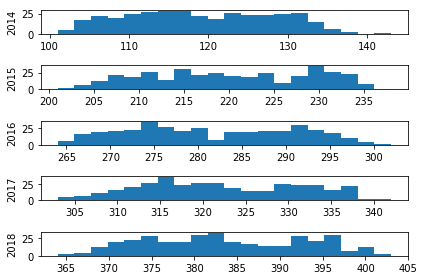

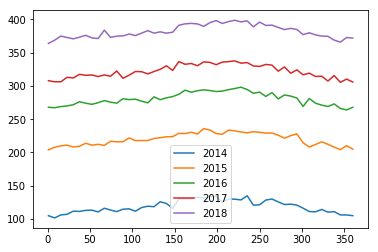

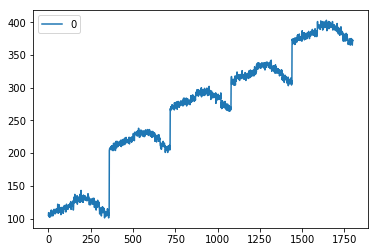

In [149]:
means= [5,10, 13,15,18, 28,29,30 ,25,20,10 , 4]
trends = [20*k for k in means]

years5 = gen_multi_dim_data(trends=trends, means= means,stds=[2,3,4,5,6],samples=30)

dff = convert_to_df(years5,["2014","2015","2016","2017","2018"])
df_to_hist(dff)
summarize_df_plots(dff)
datas = []
for col in dff.columns :
  datas.append( dff[col].values.flatten())

flat= np.array(datas).flatten()
dataset = pd.DataFrame(flat)
dataset.plot()    

Params 360 720 add False add


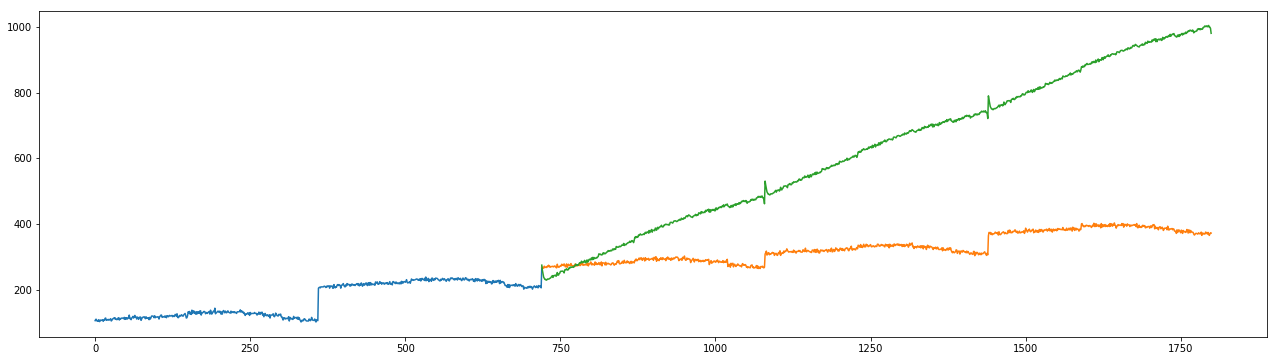

Params 360 1080 add False add


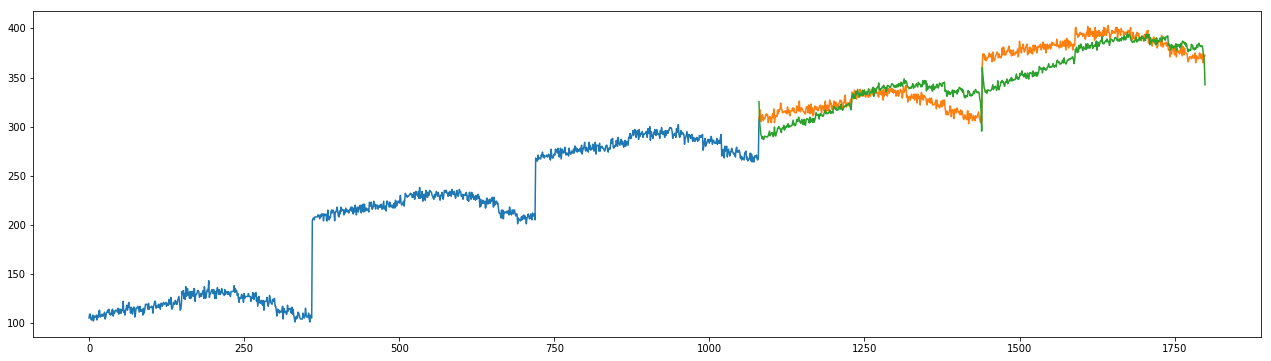

Params 360 1440 add False add


In [ ]:
slpits = [360*2,360*3,360*4]
for slpit in slpits:
    apply_yearly_holtwinters(dataset,360, slpit,"add",False,"add")
#Above we can see at last iteration it captures the trend    